In [27]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Binary Classification

### K-Nearest Neighbours Clasifier

In [9]:
# Import Churn data only for selected columns
_columns = ['account_length','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','customer_service_calls','churn']
churn_df = pd.read_csv("../data/telecom_churn_clean.csv", usecols=_columns)

# "account_length" and "customer_service_calls" are treated as features because account length indicates customer loyalty, 
# and frequent customer service calls may signal dissatisfaction, both of which can be good predictors of churn. Convert these two features as numpy array

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values
print(X.shape, y.shape)

# Instantiate a KNeighborsClassifier called knn with 6 neighbors.
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)

# Create a new array of input data
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Create y_pred by predicting the target values of the unseen features X_new using the knn model.
y_pred = knn.predict(X_new)

#Print the predicted labels for the set of predictions.
print("Predictions: {}".format(y_pred))

(3333, 2) (3333,)
Predictions: [0 1 0]


## Measuring Model Performance

### Train/test split + computing accuracy

In [38]:
# Create Numpy array to store X and y

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the knn model to the training data.
knn.fit(X_train, y_train)

# Compute and print the model's accuracy for the test data.
print(knn.score(X_test, y_test))

0.8665667166416792


### Overfitting and underfitting

In [26]:
# Create neighbors as a numpy array of values from 1 up to and including 13
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

# Instantiate a KNeighborsClassifier, with the number of neighbors equal to the neighbor iterator.
for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {np.int64(1): 1.0, np.int64(2): 0.904351087771943, np.int64(3): 0.9144786196549137, np.int64(4): 0.8923480870217554, np.int64(5): 0.8960990247561891, np.int64(6): 0.8882220555138785, np.int64(7): 0.8927231807951987, np.int64(8): 0.885596399099775, np.int64(9): 0.8870967741935484, np.int64(10): 0.881470367591898, np.int64(11): 0.8848462115528882, np.int64(12): 0.878469617404351} 
 {np.int64(1): 0.8260869565217391, np.int64(2): 0.8590704647676162, np.int64(3): 0.8515742128935532, np.int64(4): 0.8605697151424287, np.int64(5): 0.8680659670164917, np.int64(6): 0.8650674662668666, np.int64(7): 0.8665667166416792, np.int64(8): 0.8665667166416792, np.int64(9): 0.8680659670164917, np.int64(10): 0.8650674662668666, np.int64(11): 0.8710644677661169, np.int64(12): 0.8650674662668666}


### Visualizing model complexity

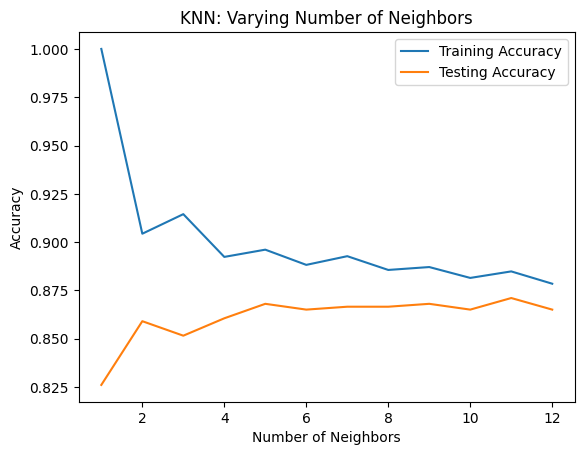

In [31]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy" )

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")


# Display the plot
plt.show()